In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mean())

In [7]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mean())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# dropping the null values remanining
df.dropna(inplace=True)

In [10]:
df.shape

(542, 13)

In [11]:
# categorical to numerical conversion
df['Loan_Status'].replace({'Y':1},inplace=True)
df['Loan_Status'].replace({'N':0},inplace=True)
df['Loan_Status'].value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\4257147976.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace({'Y':1},inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\4257147976.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'].replace(

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [12]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [13]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [14]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [15]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [16]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [17]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [18]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [19]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [20]:
df['Credit_History'].value_counts()

Credit_History
1.000000    425
0.000000     74
0.842199     43
Name: count, dtype: int64

In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn import metrics

In [23]:
df.shape

(542, 13)

In [24]:
X=df.drop('Loan_ID',axis=1)
X=X.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [26]:
model=LogisticRegression(max_iter=3500)
model.fit(X_train,Y_train)
log=model.predict(X_test)
accuracy=accuracy_score(log,Y_test)*100
print("Logistic regression model accuracy:",round(accuracy,2))

Logistic regression model accuracy: 80.98


In [27]:
import pandas as pd
df1 = pd.read_csv('test.csv')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [29]:
df1.shape

(367, 12)

In [30]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
df1["LoanAmount"]=df1["LoanAmount"].fillna(df["LoanAmount"].mean())
df1["Credit_History"]=df1["LoanAmount"].fillna(df["Credit_History"].mean())

In [32]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [33]:
df1.dropna(inplace=True)

In [34]:
df1.shape

(318, 12)

In [35]:
df1.Gender=df1.Gender.map({'Male':1,'Female':0})
df1['Gender'].value_counts()

Gender
1    253
0     65
Name: count, dtype: int64

In [36]:
df1.Married=df1.Married.map({'Yes':1,'No':0})
df1['Married'].value_counts()

Married
1    204
0    114
Name: count, dtype: int64

In [37]:
df1.Dependents=df1.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df1['Dependents'].value_counts()

Dependents
0    183
2     54
1     46
3     35
Name: count, dtype: int64

In [38]:
df1.Education=df1.Education.map({'Graduate':1,'Not Graduate':0})
df1['Education'].value_counts()

Education
1    247
0     71
Name: count, dtype: int64

In [39]:
df1.Self_Employed=df1.Self_Employed.map({'Yes':1,'No':0})
df1['Self_Employed'].value_counts()

Self_Employed
0    284
1     34
Name: count, dtype: int64

In [40]:
df1.Property_Area=df1.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df1['Property_Area'].value_counts()

Property_Area
2    122
1     99
0     97
Name: count, dtype: int64

In [41]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,110.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,126.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,208.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,100.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,78.0,2


In [42]:
df1.shape

(318, 12)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            318 non-null    object 
 1   Gender             318 non-null    int64  
 2   Married            318 non-null    int64  
 3   Dependents         318 non-null    int64  
 4   Education          318 non-null    int64  
 5   Self_Employed      318 non-null    int64  
 6   ApplicantIncome    318 non-null    int64  
 7   CoapplicantIncome  318 non-null    int64  
 8   LoanAmount         318 non-null    float64
 9   Loan_Amount_Term   318 non-null    float64
 10  Credit_History     318 non-null    float64
 11  Property_Area      318 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 32.3+ KB


In [44]:
X1=df1.drop('Loan_ID',axis=1)

In [45]:
test_predictions = model.predict(X1)

In [46]:
print("Predictions for test.csv:")
print(test_predictions)

Predictions for test.csv:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
print(f'Length of Y_test: {len(Y_test)}')
print(f'Length of test_predictions: {len(test_predictions)}')

Length of Y_test: 163
Length of test_predictions: 318


In [48]:
from sklearn.metrics import accuracy_score
#Y_test and test_predictions are correctly aligned and of the same length now
accuracy = accuracy_score(Y_test[:163], test_predictions[:163]) * 100
print(f'Logistic regression model accuracy on test.csv: {accuracy:.2f}%')

Logistic regression model accuracy on test.csv: 71.17%


In [49]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


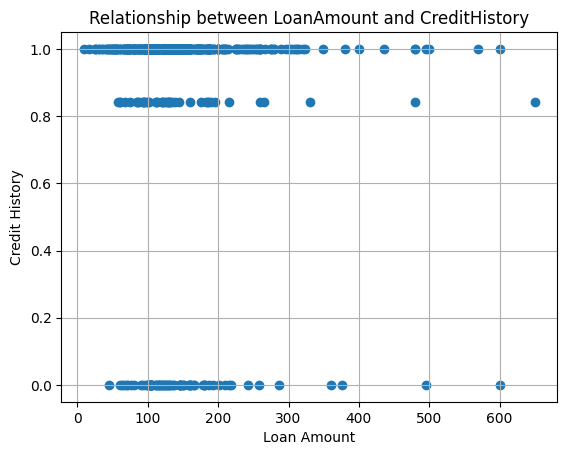

In [50]:
import matplotlib.pyplot as plt
plt.scatter(df["LoanAmount"],df["Credit_History"])
plt.title("Relationship between LoanAmount and CreditHistory")
plt.xlabel("Loan Amount")
plt.grid()
plt.ylabel("Credit History")
plt.show()

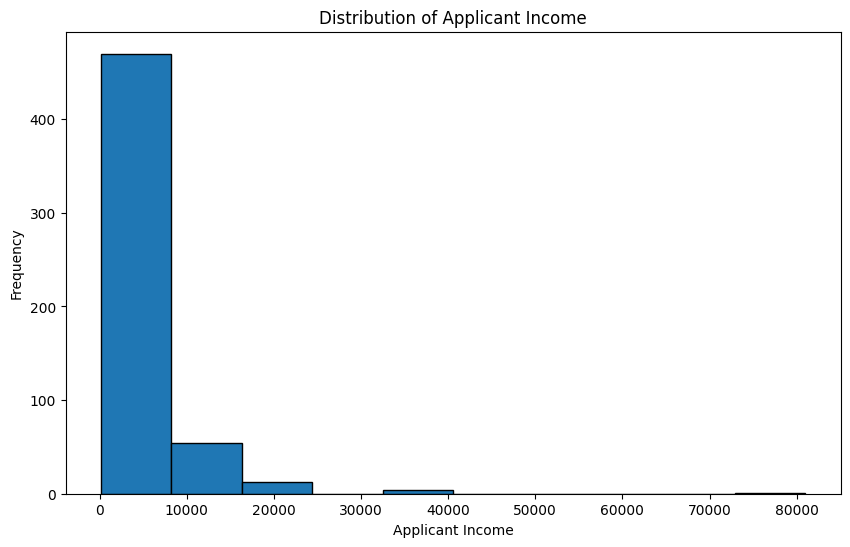

In [51]:
plt.figure(figsize=(10, 6))  
plt.hist(df['ApplicantIncome'],edgecolor='black')  
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

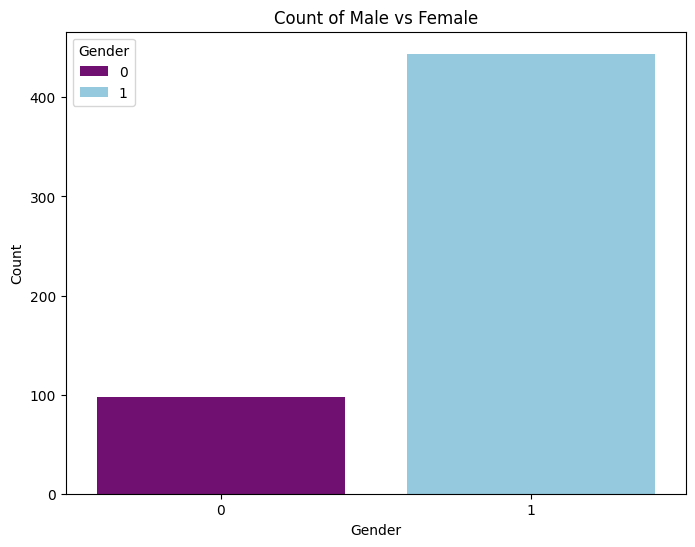

In [52]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))  
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette=["purple", "skyblue"], dodge=False)
plt.title('Count of Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [54]:
loan_status_counts = df['Loan_Status'].value_counts()

# Print the counts
print("Count of 'Yes' in Loan_Status:", loan_status_counts[1])
print("Count of 'No' in Loan_Status:", loan_status_counts[0])

Count of 'Yes' in Loan_Status: 376
Count of 'No' in Loan_Status: 166


In [55]:
unique_values = df['Loan_Status'].unique()

# Print the unique values
print("Unique values in Loan_Status column:", unique_values)

Unique values in Loan_Status column: [1 0]


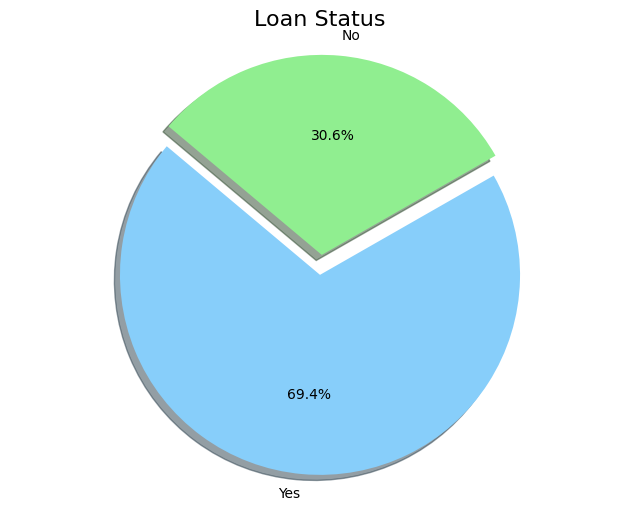

In [56]:
import matplotlib.pyplot as plt

# Data
mylabels = ["Yes", "No"]
sizes = [376, 166]
explode = (0.1, 0)  # Explode the first slice ('Yes')

# Custom colors
colors = ['lightskyblue', 'lightgreen']

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=mylabels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Loan Status', fontsize=16)

# Show plot
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\904572051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Property_Area',palette=["orange","blue","green"])


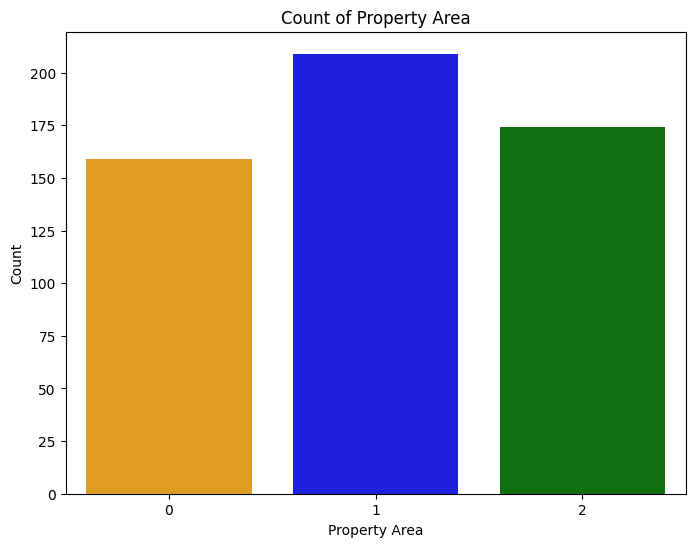

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Property_Area',palette=["orange","blue","green"])
plt.title('Count of Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\951325126.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Property_Area', y='ApplicantIncome', palette=colors)


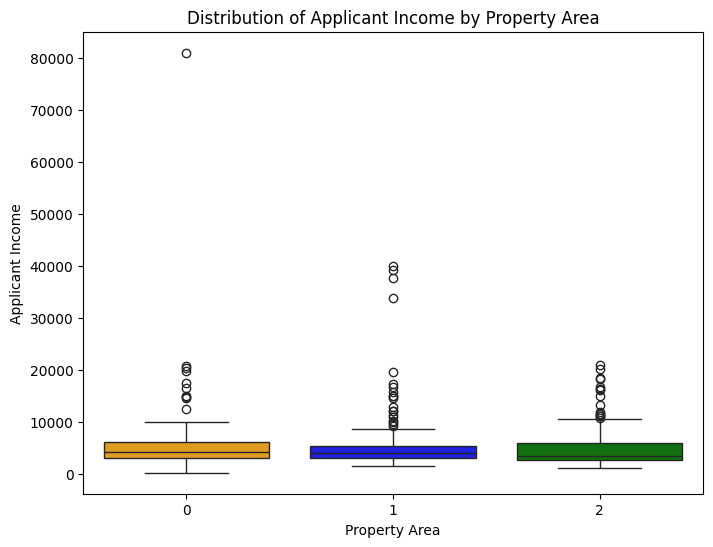

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["orange", "blue", "green"]  
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Property_Area', y='ApplicantIncome', palette=colors)
plt.title('Distribution of Applicant Income by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Applicant Income')
plt.show()

In [66]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

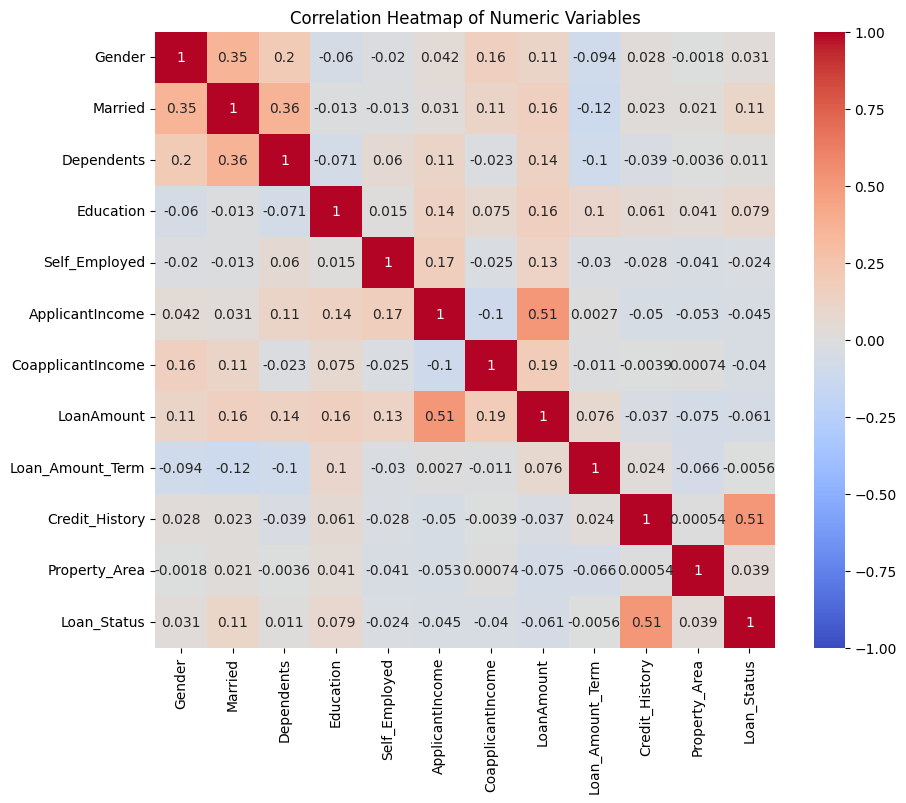

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()